# Exercises

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
diamonds = pd.read_csv('diamonds.csv',index_col=0)

## Task 1: Basics

- have a look at the diamonds dataset: how many rows do we have?, what are the different columns?
- create a DataFrame consisting only of the x, y and z columns
- access row 5 to 15 in diamonds
- create a DataFrame consisting only of row 5 to 15 and name the rows "A" to "K" (hint: each DataFrame has an .index attribute which can be modified)
- access row "C" in the DataFrame you just created
- use the mixed access operator (.ix) to get the price of the 500th diamond
- group the diamnods by color and compute the mean of the price
- find all the diamonds with more than 2 carat and plot their price distribution in a histogram
- compute and plot the standard deviation of the x dimension for the different cuts



### Task 2: Gene expression data

In this exercise we will work with a realistic gene expression data set. [Buettner et al.](http://www.nature.com/nbt/journal/v33/n2/full/nbt.3102.html) used single cell RNA-sequencing data, to identify sub-populations of cells with similar gene-expression profiles. RNA-sequencing (RNA seq) data uses next generation sequencing techniques to quantify RNA abundance. 

Go to the link given above and download the dataset "Corrected and uncorrected expression values for T-cell data." from the supplementary information section. Have a look at the dataset with Libreoffice and import the second datasheet (Cell-cycle corrected gene expr) as a pandas DataFrame. Use the `read_excel()` function together with the sheetname attribute.



In [3]:
df_ge_corrected = pd.read_excel( 'nbt.3102-S7.xlsx', sheetname=1 ) 

In the imported table, each column represents a gene, while each row represents a single cell. This table structure is great for an overview, but it is for example not easy to plot a histogramm of the expression of all genes in all cells. For this it would be better to have all expression values in a single column. 

Convert the table to a table with 3 columns: `cell_id`, `gene` and `expression`. 

Example:

Original table:

|  | Gnai3 | Cdc45 | Narf | Klf6 |
|--------|--------|--------|:-------:|--------|
| Cell 1 | 3.2322 | 3.1981 | 0.29411 | 1.7343 |
| Cell 2 | 1.9832 | 1.173 | 0.49389 | 3.8505 |
| Cell 3 | 2.2482 | 3.1705 | 1.6279 | 1.6306 |

converted table:

| cell_id | gene | expression |
|---------|-------|------------|
| Cell 1 | Gnai3 | 3.2322 |
| Cell 1 | Cdc45 | 3.1981 |
| Cell 1 | Narf | 0.29411 |
| Cell 1 | Klf6 | 1.7343 |
| Cell 2 | Gnai3 | 1.9832 |
| Cell 2 | Cdc45 | 1.173 |
| ... | ... | ... |

this conversion can be done using the function `DataFrame.stack()`, which yields a multi-indexed DataFrame. This multi-indexed DataFrame can be converted to a conventional DataFrame using the method `reset_index()`.

In [10]:
df_ge_corrected_slim = df_ge_corrected.stack()
df_ge_corrected_slim = df_ge_corrected_slim.reset_index()
df_ge_corrected_slim.columns = ('cell_id', 'gene', 'expression')
df_ge_corrected_slim.head()

,cell_id,gene,expr
0,Cell 1,Gnai3,3.23220
1,Cell 1,Cdc45,3.19810
2,Cell 1,Narf,0.29411
3,Cell 1,Klf6,1.73430
4,Cell 1,Scmh1,0.26642


In the original paper, each cell was assigned to a cluster, based on a principal component analysis of their gene expression profile. The information to which cluster a cell belongs is given in the third sheet of the Excel file (Cluster Assignment). Read in also this sheet and combine the two tables to have expression and cluster assignment in one table.

In [13]:
df_clusters = pd.read_excel( 'nbt.3102-S7.xlsx', sheetname=2 )
df_clusters.rename(columns={'CellNr': 'cell_id', 'Gata3HighCLuster': 'cluster'}, inplace=True)
df_merge = pd.merge(df_ge_corrected_slim, df_clusters)

Create a boxplot of the expression of all genes for both clusters.

/usr/lib/python3/dist-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


OrderedDict([(0,
              {'boxes': [<matplotlib.lines.Line2D at 0x7f821ebe9940>],
               'caps': [<matplotlib.lines.Line2D at 0x7f821f586b38>,
               'fliers': [<matplotlib.lines.Line2D at 0x7f821ebc5dd8>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x7f821ebedf60>],
               'whiskers': [<matplotlib.lines.Line2D at 0x7f821ebe91d0>,
                <matplotlib.lines.Line2D at 0x7f821f59a0f0>]}),
             (1,
              {'boxes': [<matplotlib.lines.Line2D at 0x7f821eb4b588>],
               'caps': [<matplotlib.lines.Line2D at 0x7f821eb4ee10>,
               'fliers': [<matplotlib.lines.Line2D at 0x7f821eb52eb8>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x7f821eb526a0>],
               'whiskers': [<matplotlib.lines.Line2D at 0x7f821eb4bda0>,
                <matplotlib.lines.Line2D at 0x7f821eb4beb8>]})])

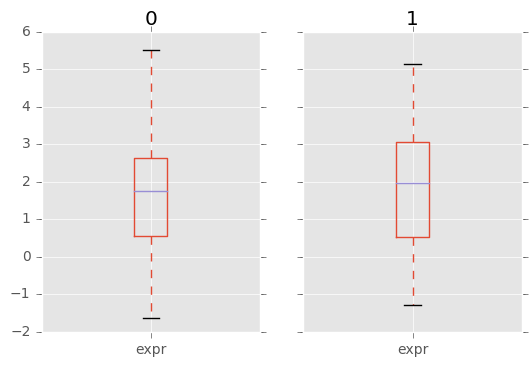

In [16]:
df_merge.groupby('cluster').boxplot(column='expr')

Draw a boxplot of the expression of the different cells in each cluster only for the gene Gata3.

/usr/lib/python3/dist-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


OrderedDict([(0,
              {'boxes': [<matplotlib.lines.Line2D at 0x7f821f0c80b8>],
               'caps': [<matplotlib.lines.Line2D at 0x7f821f0c7b00>,
               'fliers': [<matplotlib.lines.Line2D at 0x7f821f0a4ba8>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x7f821f2c0390>],
               'whiskers': [<matplotlib.lines.Line2D at 0x7f821f0c8ac8>,
                <matplotlib.lines.Line2D at 0x7f821f0adbe0>]}),
             (1,
              {'boxes': [<matplotlib.lines.Line2D at 0x7f821f482860>],
               'caps': [<matplotlib.lines.Line2D at 0x7f821f468f98>,
               'fliers': [<matplotlib.lines.Line2D at 0x7f821f457780>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x7f821f476860>],
               'whiskers': [<matplotlib.lines.Line2D at 0x7f821f482f28>,
                <matplotlib.lines.Line2D at 0x7f821f468780>]})])

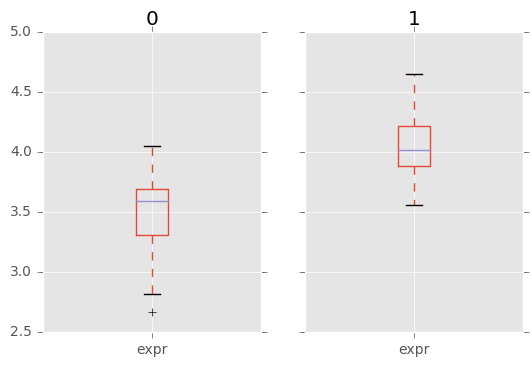

In [17]:
df_merge[df_merge['gene'] == 'Gata3'].groupby('cluster').boxplot(column='expr')

Create a scatter-plot of the two principal components for all Gata3 measurements.

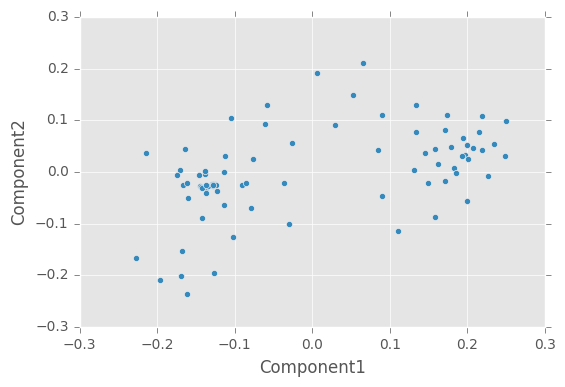

In [18]:
df_merge[df_merge['gene'] == 'Gata3'].plot(x='Component1', y='Component2', kind='scatter' )

Color the points in the scatter plots according to whether they belong to cluster 0 or 1.

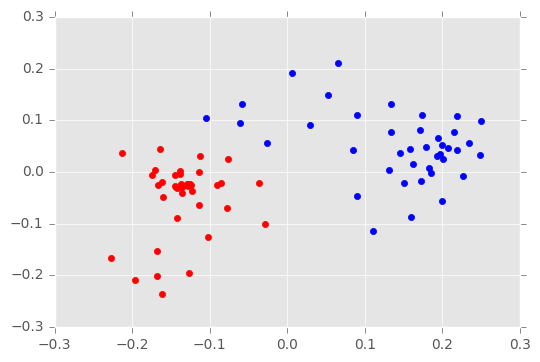

In [20]:
df_gata = df_merge[df_merge['gene'] == 'Gata3']
c = ['r', 'b']
for cluster in [0, 1]: 
    df_gata_cluster = df_gata[df_gata['cluster'] == cluster]
    plt.scatter(df_gata_cluster['Component1'], df_gata_cluster['Component2'], color=c[cluster])